In [1]:
require 'nn'

{
  VolumetricMaxUnpooling : table: 0x06fca200
  ConcatTable : table: 0x06bddc90
  SpatialAveragePooling : table: 0x06c64fc8
  BCECriterion : table: 0x06f76150
  Reshape : table: 0x06f7a980
  Jacobian : 
    {
      forward : function: 0x06f921e0
      testAllUpdate : function: 0x06c52d40
      testDiagHessianInput : function: 0x06c5c9d0
      testDiagHessianWeight : function: 0x06c5c9f0
      testDiagHessianBias : function: 0x06c5ca10
      testDiagHessian : function: 0x06f92200
     

 testJacobian : function: 0x06c52e08
      testIO : function: 0x06c52d20
      testJacobianUpdateParameters : function: 0x06f92188
      backwardDiagHessian : function: 0x06c5ca38
      testJacobianParameters : function: 0x06c5ca78
      backwardUpdate : function: 0x06f921c0
      forwardUpdate : function: 0x06c52de8
      backward : function: 0x06f992e8
      linearModuleDiagHessian : function: 0x06c5ca58
    }
  SparseLinear : table: 0x06f780e0
  SpatialCrossMapLRN : table: 0x06f53d00
  CAddTable : table: 0x06fa56d0
  TemporalConvolution : table: 0x06f8baf0
  PairwiseDistance : table: 0x06fb4ff0
  WeightedMSECriterion : table: 0x06f57048
  SmoothL1Criterion : table: 0x06fd4fe0
  SpatialLPPooling : table: 0x06c10f50
  TanhShrink : table: 0x06fce7a8
  MixtureTable : table: 0x06bd8ad0
  MSECriterion : table: 0x06f9cec0
  LogSoftMax : table: 0x06fc6928
  Identity : table: 0x06bef798
  Exp : table: 0x06fc0a38
  Add : table: 0x06f9e0a8
  SpatialConvolutionLocal : table: 0x06feac20
  BatchN

able: 0x06f77f78
  Power : table: 0x06fd1120
  Sqrt : table: 0x06fd3598
  Sequential : table: 0x06f6cc68
  Square : table: 0x06fd2320
  test : function: 0x0702aa98
  MM : table: 0x06c33b70
  SoftMax : table: 0x06fc89c0
  ParallelCriterion : table: 0x067e7fb0
  Cosine : table: 0x06fbf7b8
  Clamp : table: 0x06fc42e8
  SpatialConvolutionMM : table: 0x06f59e28
  Sigmoid : table: 0x06fc7950
  LogSigmoid : table: 0x06fc5428
  TemporalMaxPooling : table: 0x06fc92e0
  Threshold : table: 0x06fd6ad0
  Sum : table: 0x06f96270
  SoftSign : table: 0x06fcc440
  ParallelTable : table: 0x06fd3398
  Min : table: 0x06f8f188
  AddConstant : table: 0x06fa04f8
  Replicate : table: 0x06f847c0
  Tanh : table: 0x06fcd3f0
  CDivTable : table: 0x06fa7360
  Mul : table: 0x06f99e00
  Select : table: 0x06f80230
  ReLU : table: 0x06fd8578
  SpatialFullConvolutionMap : table: 0x0672a708
  GradientReversal : table: 0x06f8c370
  SpatialConvolution : table: 0x06fe4c90
  Criterion : table: 0x06f6b950
  SpatialConvolutio

In [35]:
net = nn.Sequential()
local m = net.modules
net:add(nn.SpatialConvolution(3,6,3,3,1,1))

In [5]:
data = torch.ones(10,3,96,96)

In [7]:
require 'image';


In [9]:
imgs = image.lena()

In [10]:
img:size()

[string "local f = function() return img:size() end; l..."]:1: attempt to index global 'img' (a nil value)
stack traceback:
	[string "local f = function() return img:size() end; l..."]:1: in function 'f'
	[string "local f = function() return img:size() end; l..."]:1: in main chunk
	[C]: in function 'xpcall'
	...uchristopher/torch/install/share/lua/5.1/itorch/main.lua:179: in function <...uchristopher/torch/install/share/lua/5.1/itorch/main.lua:143>
	...uchristopher/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...ristopher/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...ristopher/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...ristopher/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	...uchristopher/torch/install/share/lua/5.1/itorch/main.lua:350: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x01064d6bb0: 

In [11]:
imgs:size()

   3
 512
 512
[torch.LongStorage of size 3]



In [13]:
imgs = image.scale(imgs, 96,96)

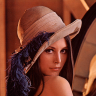

In [23]:
itorch.image(imgs)

In [29]:
data = torch.DoubleTensor(10,3,96,96)

In [30]:
for i = 1,10 do
    data[i]:copy(image.translate(imgs,i*3,i*2))
end

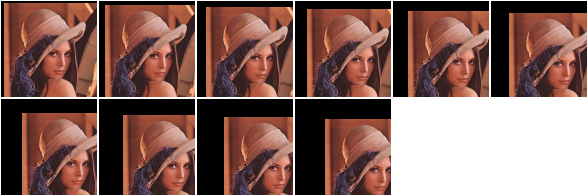

In [33]:
itorch.image(data)

In [38]:
--do convolution
net:forward(data);

In [89]:
net:evaluate(data);

In [92]:
o = net.modules[1].output;

In [93]:
o:size()

  10
 564
[torch.LongStorage of size 2]



In [56]:
require 'manifold';


In [94]:
o:size()

  10
 564
[torch.LongStorage of size 2]



In [70]:
mm = require 'manifold';


In [95]:
print(o:size())
opts = {ndims = 2, perplexity = 30, pca = 5, use_bh = false, theta=0.5}
mapped_o = mm.embedding.tsne(o,opts)

  10
 564
[torch.LongStorage of size 2]

Performing preprocessing using PCA...	


Computing P-values...	


Running t-SNE...	


Iteration 10: KL divergence is 19.52226789066	
Iteration 20: KL divergence is 18.524825382267	


Iteration 30: KL divergence is 16.378661501161	


Iteration 40: KL divergence is 15.797141927322	


Iteration 50: KL divergence is 19.396488156861	


Iteration 60: KL divergence is 16.611573509225	


Iteration 70: KL divergence is 33.716786393458	


Iteration 80: KL divergence is 19.072134698907	


Iteration 90: KL divergence is 18.139650985603	


Iteration 100: KL divergence is 21.495686723184	


Iteration 110: KL divergence is 20.529346117626	


Iteration 120: KL divergence is 21.72690122707	


Iteration 130: KL divergence is 24.21111786736	


Iteration 140: KL divergence is 22.344067473285	


Iteration 150: KL divergence is 20.229662046712	


Iteration 160: KL divergence is 20.981596677458	


Iteration 170: KL divergence is 26.422439482555	


Iteration 180: KL divergence is 23.509946161675	


Iteration 190: KL divergence is 21.949848056782	


Iteration 200: KL divergence is 3.2510100466323	


Iteration 210: KL divergence is 1.4540427947395	


Iteration 220: KL divergence is 1.0235775092546	


Iteration 230: KL divergence is 0.71087935925172	


Iteration 240: KL divergence is 0.50053144633568	


Iteration 250: KL divergence is 0.38283206336396	


Iteration 260: KL divergence is 0.2904209435216	


Iteration 270: KL divergence is 0.28735591172442	


Iteration 280: KL divergence is 0.2898571977988	


Iteration 290: KL divergence is 0.28877575872922	


Iteration 300: KL divergence is 0.28768924649162	


Iteration 310: KL divergence is 0.28651297522449	


Iteration 320: KL divergence is 0.28518191557439	


Iteration 330: KL divergence is 0.28391450646125	


Iteration 340: KL divergence is 0.28297574939893	


Iteration 350: KL divergence is 0.28245135861053	


Iteration 360: KL divergence is 0.28220601435733	


Iteration 370: KL divergence is 0.2820896573928	


Iteration 380: KL divergence is 0.28203405296982	


Iteration 390: KL divergence is 0.2820047285439	


Iteration 400: KL divergence is 0.28198351168804	


Iteration 410: KL divergence is 0.28196783878208	


Iteration 420: KL divergence is 0.28195515292337	


Iteration 430: KL divergence is 0.28192823996612	


Iteration 440: KL divergence is 0.28189282961506	


Iteration 450: KL divergence is 0.28186786215629	


Iteration 460: KL divergence is 0.28185767648256	


Iteration 470: KL divergence is 0.28185469225423	


Iteration 480: KL divergence is 0.28185360043458	


Iteration 490: KL divergence is 0.28184267609144	


Iteration 500: KL divergence is 0.28176205000878	


Iteration 510: KL divergence is 0.28163831308646	


Iteration 520: KL divergence is 0.28152027505793	


Iteration 530: KL divergence is 0.28142427510363	


Iteration 540: KL divergence is 0.28135333743224	


Iteration 550: KL divergence is 0.28130640177225	


Iteration 560: KL divergence is 0.28127894872739	


Iteration 570: KL divergence is 0.28126478582198	


Iteration 580: KL divergence is 0.28125833261844	


Iteration 590: KL divergence is 0.28125572470405	


Iteration 600: KL divergence is 0.28125478503926	


Iteration 610: KL divergence is 0.28125448218353	

Iteration 620: KL divergence is 0.28125439474189	


Iteration 630: KL divergence is 0.28125315428709	


Iteration 640: KL divergence is 0.28123922856876	


Iteration 650: KL divergence is 0.28121174538947	


Iteration 660: KL divergence is 0.28118079843004	


Iteration 670: KL divergence is 0.28115595195128	


Iteration 680: KL divergence is 0.28113935009212	


Iteration 690: KL divergence is 0.28112594186181	


Iteration 700: KL divergence is 0.28111273866373	


Iteration 710: KL divergence is 0.28110108687199	


Iteration 720: KL divergence is 0.28109281910023	


Iteration 730: KL divergence is 0.2810880092415	


Iteration 740: KL divergence is 0.28108564901347	


Iteration 750: KL divergence is 0.28108454515381	


Iteration 760: KL divergence is 0.2810839412655	


Iteration 770: KL divergence is 0.28108363239939	


Iteration 780: KL divergence is 0.2810835296016	


Iteration 790: KL divergence is 0.28108351214445	


Iteration 800: KL divergence is 0.2810835106107	


Iteration 810: KL divergence is 0.28108351047914	


Iteration 820: KL divergence is 0.28108351047499	


Iteration 830: KL divergence is 0.28108351047554	


Iteration 840: KL divergence is 0.28108351047562	


Iteration 850: KL divergence is 0.28108351047563	


Iteration 860: KL divergence is 0.28108351047563	


Iteration 870: KL divergence is 0.27917869390464	


Iteration 880: KL divergence is 0.27082777543888	


Iteration 890: KL divergence is 0.26623393458478	


Iteration 900: KL divergence is 0.26546130893159	


Iteration 910: KL divergence is 0.26490234993126	


Iteration 920: KL divergence is 0.2644743309146	


Iteration 930: KL divergence is 0.26415678805388	


Iteration 940: KL divergence is 0.26391103516507	


Iteration 950: KL divergence is 0.2637362365916	


Iteration 960: KL divergence is 0.26358932480021	
Iteration 970: KL divergence is 0.26344927688472	


Iteration 980: KL divergence is 0.26331580692268	


Iteration 990: KL divergence is 0.26319420957644	


Iteration 1000: KL divergence is 0.26308518471945	


In [80]:
mapped_o:size()

 10
  2
[torch.LongStorage of size 2]



In [87]:
im_size = 2048
map_im = mm.draw_image_map(mapped_o, data, im_size, 0, true)

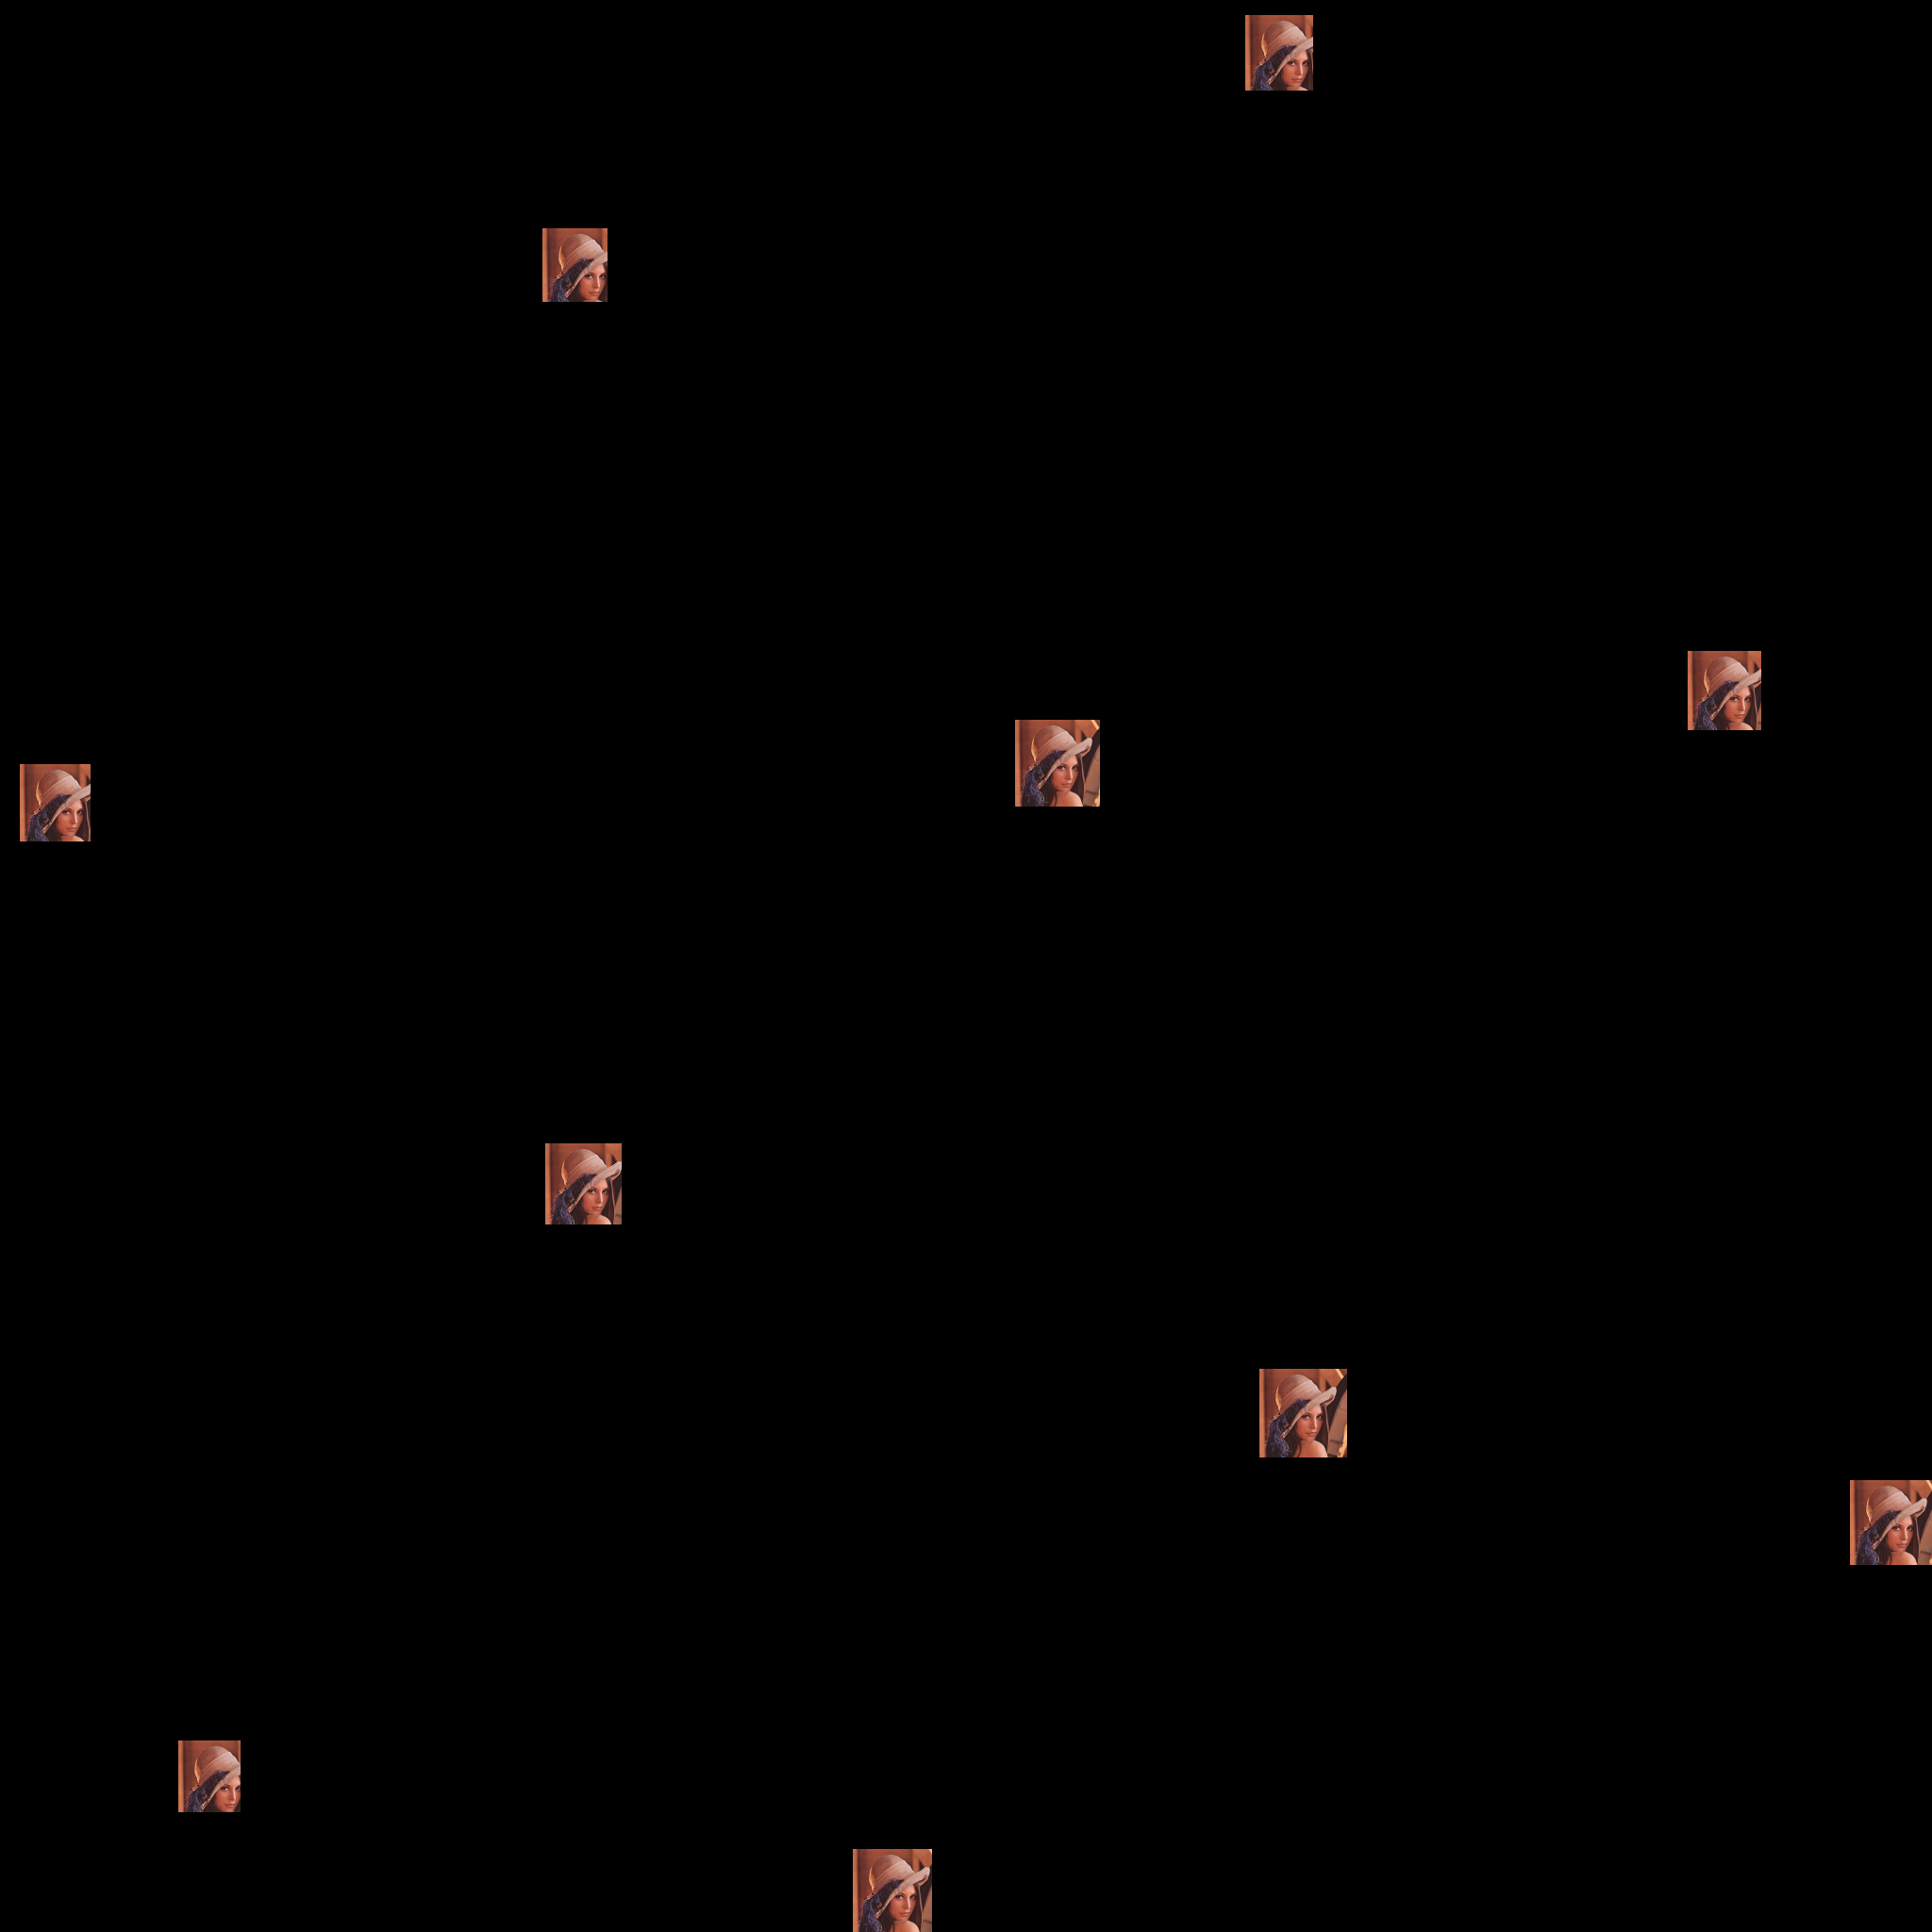

In [88]:
itorch.image(map_im)